In [1]:
import torch
from torchvision import datasets, transforms
from torchvision.transforms.functional import InterpolationMode
from torch.utils.data import DataLoader
import numpy as np

In [2]:
import torch
import torchvision
import torch.nn as nn

pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# Change the classifier head to match with binary classification:
# {distracted_driver, non_distracted_driver}
pretrained_vit.heads = nn.Linear(in_features=768, out_features=2)
pretrained_vit_transforms = pretrained_vit_weights.transforms()

In [3]:
import torch
import torchvision
import torch.nn as nn

pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# Change the classifier head to match with binary classification:
# {distracted_driver, non_distracted_driver}
pretrained_vit.heads = nn.Linear(in_features=768, out_features=2)
pretrained_vit_transforms = pretrained_vit_weights.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [4]:
import torchvision.transforms as transforms
from torchvision.transforms.functional import InterpolationMode

def ImageClassification(crop_size, resize_size, mean, std, interpolation, num_output_channels=3):
    """
    Creates a torchvision transform for image classification that converts images to grayscale
    and replicates the grayscale image across three channels.

    Parameters:
    - crop_size (list or int): The size of the crop (height, width) applied to the image.
    - resize_size (list or int): The size (height, width) to which the image will be resized.
    - mean (list): The mean used for normalization. Should have three identical values.
    - std (list): The standard deviation used for normalization. Should have three identical values.
    - interpolation (InterpolationMode): The method used for resizing.
    - num_output_channels (int): The number of channels in the output image after grayscale transformation.

    Returns:
    - transform (transforms.Compose): A composed torchvision Transform.
    """
    transform = transforms.Compose([
        transforms.Resize(resize_size, interpolation=interpolation),
        transforms.Grayscale(num_output_channels=num_output_channels),
        transforms.CenterCrop(crop_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])
    return transform

crop_size = 224
resize_size = 256
mean = [0.485, 0.485, 0.485]  # Adjusted mean for three-channel grayscale-Using Imagenet Mean and std values
std = [0.229, 0.229, 0.229]   # Adjusted std for three-channel grayscale-Using Imagenet Mean and std values
interpolation = InterpolationMode.BILINEAR

transform = ImageClassification(crop_size, resize_size, mean, std, interpolation)

In [8]:
dataset_path = "/net/polaris/storage/deeplearning/sur_data/binary_rgb_daa/split_0/train"

# Load the dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=1024, shuffle=True, num_workers=10)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_random_images(dataloader):
    """
    Plots three random images with their corresponding class names from a DataLoader.

    Args:
    dataloader (DataLoader): A PyTorch DataLoader containing the dataset.
    """
    # Get one batch of images
    images, labels = next(iter(dataloader))
    
    # Randomly select 3 images
    indices = random.sample(range(len(images)), 3)
    selected_images = images[indices]
    selected_labels = labels[indices]

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i in range(3):
        # Un-normalize the image
        img = selected_images[i].numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.485, 0.485])
        std = np.array([0.229, 0.229, 0.229])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        # Plotting
        axs[i].imshow(img)
        axs[i].set_title(dataset.classes[selected_labels[i].item()])
        axs[i].axis('off')

    plt.show()

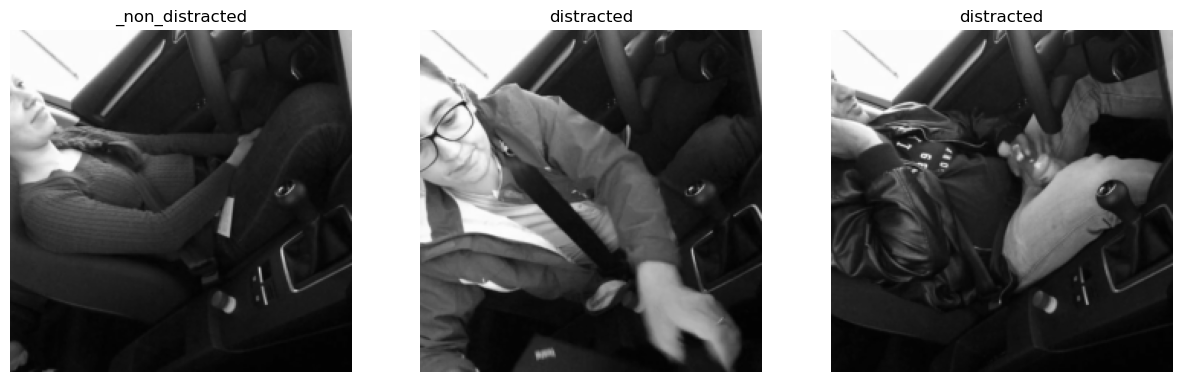

In [9]:
plot_random_images(dataloader)